In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [54]:
train_data = pd.read_excel("training.xlsx")
print("Info:")
print(train_data.info());

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 19 columns):
SUBDIVISION    1797 non-null object
YEAR           1797 non-null int64
JAN            1796 non-null float64
FEB            1795 non-null float64
MAR            1796 non-null float64
APR            1797 non-null float64
MAY            1797 non-null float64
JUN            1797 non-null float64
JUL            1797 non-null float64
AUG            1797 non-null float64
SEP            1797 non-null float64
OCT            1796 non-null float64
NOV            1796 non-null float64
DEC            1796 non-null float64
ANNUAL         1793 non-null float64
Jan-Feb        1795 non-null float64
Mar-May        1796 non-null float64
Jun-Sep        1797 non-null float64
Oct-Dec        1795 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 266.9+ KB
None


In [55]:
train_data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            2
MAR            1
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            1
NOV            1
DEC            1
ANNUAL         4
Jan-Feb        2
Mar-May        1
Jun-Sep        0
Oct-Dec        2
dtype: int64

In [56]:
train_data = train_data.fillna(train_data.mean())
print("Total no.of null values in dataset:")
train_data.isnull().sum().sum()

Total no.of null values in dataset:


0

In [57]:
train_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1951,82.7,7.2,0.0,45.4,259.0,619.9,665.3,101.3,360.9,489.0,209.6,434.8,3275.1,89.9,304.4,1747.4,1133.4
1,ANDAMAN & NICOBAR ISLANDS,1952,0.0,0.8,69.7,39.4,452.9,657.7,385.5,541.3,240.3,315.6,287.5,89.2,3079.9,0.8,562.0,1824.8,692.3
2,ANDAMAN & NICOBAR ISLANDS,1953,56.0,65.3,20.1,159.4,241.1,549.9,444.4,262.8,370.1,243.6,246.0,63.3,2721.9,121.3,420.5,1627.1,552.9
3,ANDAMAN & NICOBAR ISLANDS,1954,83.8,2.1,34.3,58.0,394.7,539.4,510.8,605.4,763.8,247.2,84.8,124.7,3449.0,85.9,487.0,2419.4,456.7
4,ANDAMAN & NICOBAR ISLANDS,1955,57.3,28.2,9.9,68.8,663.6,651.1,298.4,356.9,341.8,466.5,362.9,44.2,3349.6,85.5,742.2,1648.3,873.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,LAKSHADWEEP,1996,44.7,1.1,1.6,17.4,50.0,427.1,335.3,197.3,230.4,109.0,60.5,131.6,1606.0,45.8,69.0,1190.1,301.1
1793,LAKSHADWEEP,1997,2.2,0.1,4.9,33.8,62.3,307.0,459.6,216.8,144.0,213.5,200.8,119.7,1764.7,2.3,101.0,1127.4,534.0
1794,LAKSHADWEEP,1998,52.0,0.0,1.8,40.3,68.2,382.0,388.8,196.7,274.7,184.8,144.1,253.5,1986.9,52.0,110.3,1242.2,582.4
1795,LAKSHADWEEP,1999,47.8,2.5,18.3,20.6,416.7,279.6,459.4,133.8,73.4,305.0,51.2,49.0,1857.3,50.3,455.6,946.2,405.2


In [58]:
temp = train_data.groupby("YEAR").sum()
train_data.groupby("YEAR").sum()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,,,,,,,,,,,,,,,,,
1951,568.600000,374.200000,1493.200000,2284.0,2725.5,8484.1,11910.9,8344.4,5352.4,3582.400000,1584.200000,630.900000,47334.900000,943.000000,6502.60000,34091.4,5797.500000
1952,334.300000,664.000000,1338.300000,1408.5,3449.2,8353.7,11569.3,10381.1,4741.8,4001.800000,621.900000,814.300000,47677.300000,998.000000,6196.00000,35045.4,5438.100000
1953,1034.700000,464.900000,938.100000,1599.2,2209.8,7949.2,14823.7,10996.7,7060.1,4195.771158,737.900000,322.300000,51073.764529,1499.600000,4747.00000,40829.8,5281.210084
1954,1156.000000,1172.100000,661.000000,1039.3,2631.6,7930.7,13295.9,9982.8,9327.5,3345.000000,222.300000,632.700000,51397.200000,2328.200000,4331.80000,40536.7,4199.900000
1955,810.800000,217.700000,845.200000,1378.5,4040.7,8689.9,10264.0,11974.9,8466.6,6277.000000,1426.700000,332.900000,54724.400000,1028.500000,6264.40000,39394.8,8036.200000
1956,601.300000,414.000000,1086.700000,1382.6,4534.9,9761.5,13871.2,9781.4,6492.6,6256.300000,1815.000000,451.200000,56449.400000,1015.200000,7004.30000,39907.1,8522.600000
1957,1376.289254,482.432646,966.615367,1331.3,3278.0,8066.5,13230.2,11067.6,5431.7,3052.500000,1367.800000,593.800000,47822.764529,1858.949916,5009.30078,37795.5,5013.800000
1958,494.900000,578.300000,610.800000,1412.5,3805.1,7195.5,13174.5,13576.1,8566.4,4737.500000,1430.600000,601.700000,56184.100000,1073.400000,5828.10000,42512.9,6769.700000
1959,1105.600000,838.500000,802.900000,1203.6,3702.9,8749.3,16196.5,10376.7,9675.8,5102.400000,1224.200000,324.500000,59336.300000,1977.100000,5709.90000,44998.7,6650.800000


Text(0, 0.5, 'Annual rainfall of India(cm)')

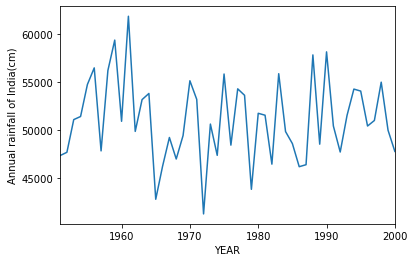

In [59]:
temp['ANNUAL'].plot()
plt.ylabel("Annual rainfall of India(cm)")

Text(0, 0.5, 'Monthly raifall of india(cm)')

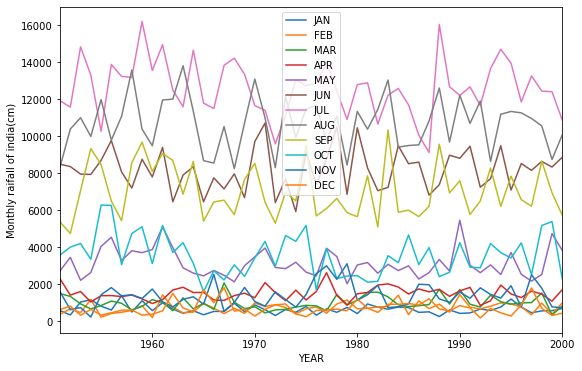

In [60]:
temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].plot(figsize=(9,6))
plt.ylabel("Monthly raifall of india(cm)")

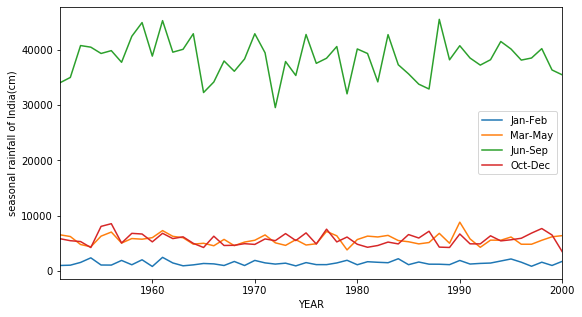

In [61]:
temp[['Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].plot(figsize=(9,5))
plt.ylabel("seasonal rainfall of India(cm)")
plt.show()

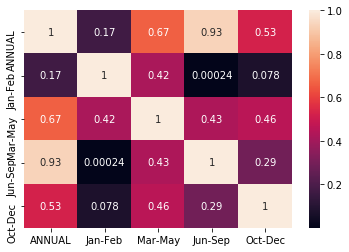

In [62]:
sns.heatmap(train_data[['ANNUAL','Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].corr(),annot=True)
plt.show()

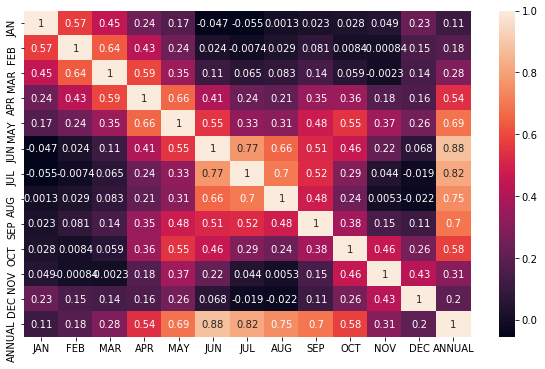

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [121]:
def plot_graphs(groundtruth,prediction,title,months):        
    N = months
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27      # the width of the bars

    
    fig = plt.figure(figsize=(13,4))
    #plt.figure(figsize=(7,10))
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("standardized rainfall")
    #ax.set_xticks(ind+width)
    #ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Actual_rainfall', 'Predicted_rainfall') )
    
    plt.show()
    
'''
#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)
'''


"\n#     autolabel(rects1)\n    for rect in rects1:\n        h = rect.get_height()\n        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),\n                ha='center', va='bottom')\n    for rect in rects2:\n        h = rect.get_height()\n        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),\n                ha='center', va='bottom')\n#     autolabel(rects2)\n"

In [65]:
train_data_arr = np.asarray(train_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = train_data_arr.reshape(train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-3):
    if (i==0):
        X_train = train_array[i:i+3]
        X_train = X_train.reshape(1,3)
        y_train = train_array[i+3]
    else :
        temp = train_array[i:i+3].reshape(1,3)
        X_train = np.concatenate((X_train, temp), axis=0)
        y_train = np.concatenate((y_train, train_array[i+3]), axis=0)

In [66]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 3, 64)             192       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 3, 128)            16512     
_________________________________________________________________
flatten_3 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

In [67]:
test_data = pd.read_excel("test.xlsx")
print("Info:")
print(test_data.info());

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
SUBDIVISION    540 non-null object
YEAR           540 non-null int64
JAN            539 non-null float64
FEB            540 non-null float64
MAR            540 non-null float64
APR            540 non-null float64
MAY            540 non-null float64
JUN            540 non-null float64
JUL            539 non-null float64
AUG            540 non-null float64
SEP            540 non-null float64
OCT            540 non-null float64
NOV            539 non-null float64
DEC            539 non-null float64
ANNUAL         538 non-null float64
Jan-Feb        539 non-null float64
Mar-May        540 non-null float64
Jun-Sep        539 non-null float64
Oct-Dec        539 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 80.3+ KB
None


In [68]:
test_data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            1
AUG            0
SEP            0
OCT            0
NOV            1
DEC            1
ANNUAL         2
Jan-Feb        1
Mar-May        0
Jun-Sep        1
Oct-Dec        1
dtype: int64

In [69]:
test_data = test_data.fillna(test_data.mean())
print("Total no.of null values in test dataset:")
test_data.isnull().sum().sum()

Total no.of null values in test dataset:


0

In [70]:
test_data_arr = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = test_data_arr.reshape(test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-3):
    if (i==0):
        X_test = test_array[i:i+3]
        X_test = X_test.reshape(1,3)
        y_test = test_array[i+3]
    else :
        temp = test_array[i:i+3].reshape(1,3)
        X_test = np.concatenate((X_test, temp), axis=0)
        y_test = np.concatenate((y_test, test_array[i+3]), axis=0)
        

In [71]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
270/270 [==============================] - 1s 4ms/step - loss: 14667.5752 - mae: 70.6079 - val_loss: 20939.3301 - val_mae: 77.5668
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 12434.8955 - mae: 68.9420 - val_loss: 20991.8867 - val_mae: 80.7992
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 12397.5654 - mae: 68.3108 - val_loss: 20246.0547 - val_mae: 77.0454
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 12325.0293 - mae: 68.2486 - val_loss: 20556.4844 - val_mae: 79.0180
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 12250.3281 - mae: 67.8811 - val_loss: 20415.5176 - val_mae: 78.9206
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 12240.6924 - mae: 68.0523 - val_loss: 20608.6973 - val_mae: 78.6349
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 12170.7637 - mae: 67.8190 - val_loss: 20406.4102 - val_mae: 79.2575
Epoch 

In [72]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'TELANGANA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

In [73]:
X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-3):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+3]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,3)
        y_year_2001_2015 = data_2001_2015[i+3]
    else:
        temp = data_2001_2015[i:i+3].reshape(1,3)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+3]), axis=0)

In [74]:
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

MEAN 2001_2015
79.31694915254236 95.06263
Standard deviation 2001_2015
99.63838995223804 94.65737


In [75]:
y_year_pred_2001_2015.shape

(177, 1)

In [76]:
y_year_2001_2015 = y_year_2001_2015.reshape(177,)

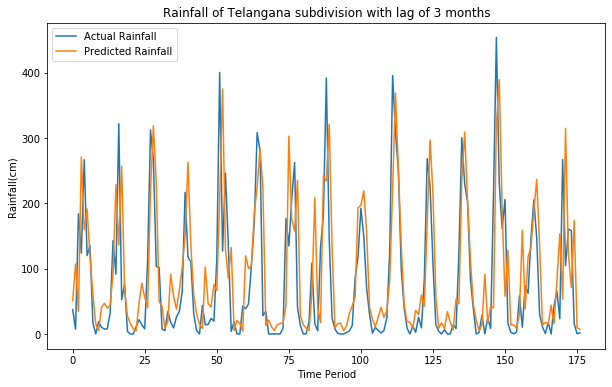

In [77]:
'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Telangana subdivision with lag of 3 months")
plt.legend()
plt.show()

In [26]:
def NSE(s, o):
    """
        Nash Sutcliffe efficiency coefficient
        input:
        s: simulated
        o: observed
        output:
        ns: Nash Sutcliffe efficient coefficient
        """
    return  1-(np.sum((s-o)**2)/np.sum((o-np.mean(o))**2))

In [27]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for telangana sub-divison :")
print(RMSE)
print("NSE for telangana sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for telangana sub-division :")
print(R2)

Co-efficient of corelation :
0.6859345454540923
RMSE(mm) for telangana sub-divison :
74.25383386216
NSE for telangana sub-division :
0.4446275123937896
R2 score for telangana sub-division :
0.4446275123937896


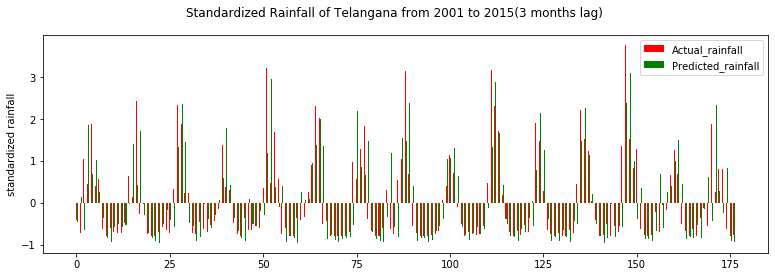

In [116]:
y_year_2001_2015 = y_year_2001_2015.reshape(177,1)
y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data_observed = scaler.fit_transform(y_year_2001_2015)
scaled_data_predicted = scaler.fit_transform(y_year_pred_2001_2015)

scaled_data_observed = scaled_data_observed.reshape(177,)
scaled_data_predicted = scaled_data_predicted.reshape(177,)
plot_graphs(scaled_data_observed,scaled_data_predicted,"Standardized Rainfall of Telangana from 2001 to 2015(3 months lag)",177)

MEAN 2001_2015
123.31581920903956 121.6766
Standard deviation 2001_2015
149.3448940435235 116.71486


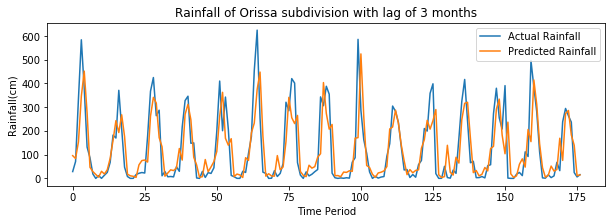

In [117]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'ORISSA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-3):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+3]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,3)
        y_year_2001_2015 = data_2001_2015[i+3]
    else:
        temp = data_2001_2015[i:i+3].reshape(1,3)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+3]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(177,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,3))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Orissa subdivision with lag of 3 months")
plt.legend()
plt.show()

In [118]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for orissa sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for orissa sub-division :")
print(R2)

Co-efficient of corelation :
0.7471890236648369
RMSE(mm) for orissa sub-divison :
99.4021391422209
NSE for orissa sub-division :
0.5569928833919564
R2 score for orissa sub-division :
0.5569928833919564


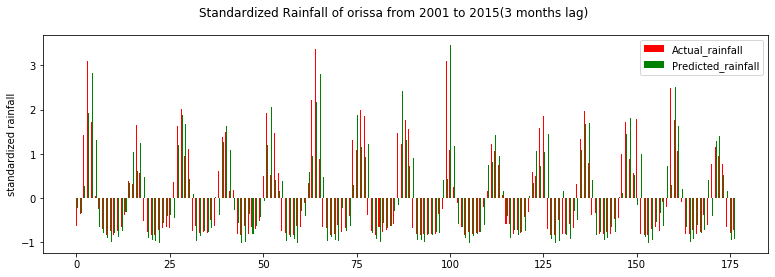

In [119]:
y_year_2001_2015 = y_year_2001_2015.reshape(177,1)
y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data_observed = scaler.fit_transform(y_year_2001_2015)
scaled_data_predicted = scaler.fit_transform(y_year_pred_2001_2015)

scaled_data_observed = scaled_data_observed.reshape(177,)
scaled_data_predicted = scaled_data_predicted.reshape(177,)
plot_graphs(scaled_data_observed,scaled_data_predicted,"Standardized Rainfall of orissa from 2001 to 2015(3 months lag)",177)

MEAN 2001_2015
98.545197740113 95.822914
Standard deviation 2001_2015
120.20377374567327 90.337585


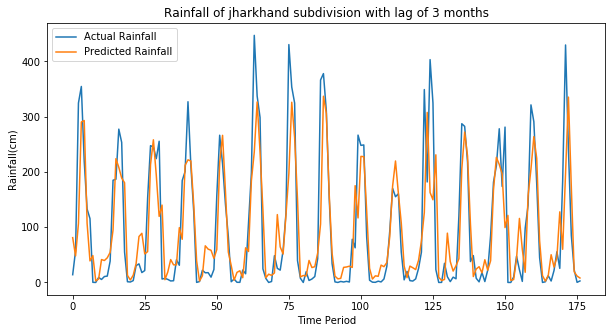

In [30]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'JHARKHAND'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-3):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+3]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,3)
        y_year_2001_2015 = data_2001_2015[i+3]
    else:
        temp = data_2001_2015[i:i+3].reshape(1,3)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+3]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(177,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,5))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of jharkhand subdivision with lag of 3 months")
plt.legend()
plt.show()

In [31]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(177,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for jharkhand sub-divison :")
print(RMSE)
print("NSE for jharkhand sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for jharkhand sub-division :")
print(R2)

Co-efficient of corelation :
0.8035567673656663
RMSE(mm) for jharkhand sub-divison :
71.87295882385435
NSE for jharkhand sub-division :
0.6424845263480858
R2 score for jharkhand sub-division :
0.6424845263480858


In [32]:
train_data_arr = np.asarray(train_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = train_data_arr.reshape(train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-6):
    if (i==0):
        X_train = train_array[i:i+6]
        X_train = X_train.reshape(1,6)
        y_train = train_array[i+6]
    else :
        temp = train_array[i:i+6].reshape(1,6)
        X_train = np.concatenate((X_train, temp), axis=0)
        y_train = np.concatenate((y_train, train_array[i+6]), axis=0)

In [33]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(6,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 64)             192       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 6, 128)            16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               98432     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [34]:
test_data_arr = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = test_data_arr.reshape(test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-6):
    if (i==0):
        X_test = test_array[i:i+6]
        X_test = X_test.reshape(1,6)
        y_test = test_array[i+6]
    else :
        temp = test_array[i:i+6].reshape(1,6)
        X_test = np.concatenate((X_test, temp), axis=0)
        y_test = np.concatenate((y_test, test_array[i+6]), axis=0)

In [35]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
270/270 [==============================] - 2s 6ms/step - loss: 14458.5000 - mae: 71.3484 - val_loss: 21247.9824 - val_mae: 82.1942
Epoch 2/10
270/270 [==============================] - 2s 6ms/step - loss: 12026.4814 - mae: 66.6454 - val_loss: 20709.0566 - val_mae: 77.4266
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 11817.6055 - mae: 65.8943 - val_loss: 21152.7305 - val_mae: 81.8911
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 11605.5928 - mae: 65.3846 - val_loss: 20751.8906 - val_mae: 77.5616
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 11532.4277 - mae: 64.9075 - val_loss: 20731.2422 - val_mae: 78.9569
Epoch 6/10
270/270 [==============================] - 1s 5ms/step - loss: 11437.8857 - mae: 64.6529 - val_loss: 20999.0371 - val_mae: 79.4120
Epoch 7/10
270/270 [==============================] - 1s 6ms/step - loss: 11250.9775 - mae: 64.1240 - val_loss: 21294.5625 - val_mae: 79.4495
Epoch 

In [36]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'TELANGANA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-6):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+6]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,6)
        y_year_2001_2015 = data_2001_2015[i+6]
    else:
        temp = data_2001_2015[i:i+6].reshape(1,6)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+6]), axis=0)

In [37]:
y_year_2001_2015 = y_year_2001_2015.reshape(174,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

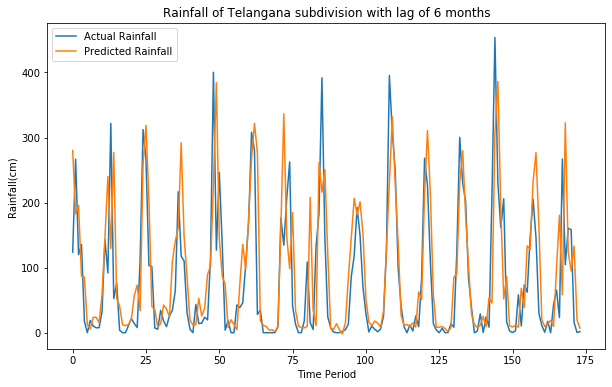

In [38]:
plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Telangana subdivision with lag of 6 months")
plt.legend()
plt.show()

In [39]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(174,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for telangana sub-divison :")
print(RMSE)
print("NSE for telangana sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for telangana sub-division :")
print(R2)

Co-efficient of corelation :
0.7082632846767242
RMSE(mm) for telangana sub-divison :
77.53522775338135
NSE for telangana sub-division :
0.39860797053615815
R2 score for telangana sub-division :
0.39860797053615815


MEAN 2001_2015
122.93735632183908 120.77696
Standard deviation 2001_2015
149.5356549798487 123.826416


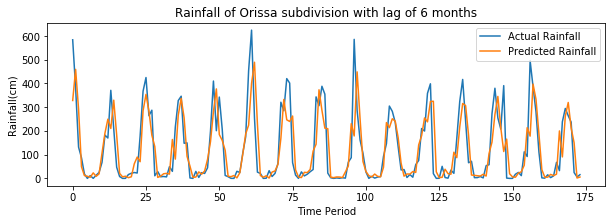

In [40]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'ORISSA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-6):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+6]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,6)
        y_year_2001_2015 = data_2001_2015[i+6]
    else:
        temp = data_2001_2015[i:i+6].reshape(1,6)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+6]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(174,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,3))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Orissa subdivision with lag of 6 months")
plt.legend()
plt.show()

In [41]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(174,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for orissa sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for orissa sub-division :")
print(R2)

Co-efficient of corelation :
0.7707617827354379
RMSE(mm) for orissa sub-divison :
95.68173741653108
NSE for orissa sub-division :
0.5905804365266257
R2 score for orissa sub-division :
0.5905804365266257


MEAN 2001_2015
97.96781609195405 105.4736
Standard deviation 2001_2015
119.80393081096831 107.16392


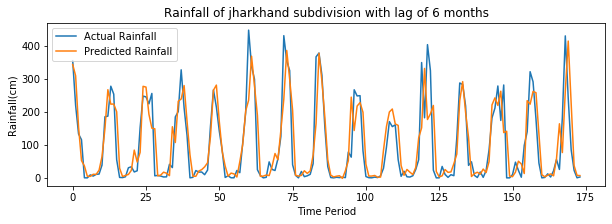

In [42]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'JHARKHAND'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-6):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+6]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,6)
        y_year_2001_2015 = data_2001_2015[i+6]
    else:
        temp = data_2001_2015[i:i+6].reshape(1,6)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+6]), axis=0)

y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

print("MEAN 2001_2015")
print(np.mean(y_year_2001_2015),np.mean(y_year_pred_2001_2015))
print("Standard deviation 2001_2015")
print(np.sqrt(np.var(y_year_2001_2015)),np.sqrt(np.var(y_year_pred_2001_2015)))

y_year_pred_2001_2015.shape

y_year_2001_2015 = y_year_2001_2015.reshape(174,)

'''
X_label = np.zeros(15)

for i in range(15):
    X_label[i] = 2001+i
'''   
plt.figure(figsize=(10,3))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of jharkhand subdivision with lag of 6 months")
plt.legend()
plt.show()

In [43]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(174,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for jharkhand sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for jharkhand sub-division :")
print(R2)

Co-efficient of corelation :
0.824049741500709
RMSE(mm) for jharkhand sub-divison :
68.80434145272739
NSE for orissa sub-division :
0.6701704596121363
R2 score for jharkhand sub-division :
0.6701704596121363


In [44]:
train_data_arr = np.asarray(train_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

train_array = train_data_arr.reshape(train_data_arr.shape[0]*12,1)

for i in range(train_array.shape[0]-9):
    if (i==0):
        X_train = train_array[i:i+9]
        X_train = X_train.reshape(1,9)
        y_train = train_array[i+9]
    else :
        temp = train_array[i:i+9].reshape(1,9)
        X_train = np.concatenate((X_train, temp), axis=0)
        y_train = np.concatenate((y_train, train_array[i+9]), axis=0)

In [45]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(9,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9, 1)]            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 9, 64)             192       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 9, 128)            16512     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [46]:
test_data_arr = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']])

test_array = test_data_arr.reshape(test_data_arr.shape[0]*12,1)

for i in range(test_array.shape[0]-9):
    if (i==0):
        X_test = test_array[i:i+9]
        X_test = X_test.reshape(1,9)
        y_test = test_array[i+9]
    else :
        temp = test_array[i:i+9].reshape(1,9)
        X_test = np.concatenate((X_test, temp), axis=0)
        y_test = np.concatenate((y_test, test_array[i+9]), axis=0)

In [47]:
from sklearn.metrics import mean_absolute_error
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
270/270 [==============================] - 2s 6ms/step - loss: 12598.5039 - mae: 67.4989 - val_loss: 19780.3867 - val_mae: 78.8501
Epoch 2/10
270/270 [==============================] - 1s 5ms/step - loss: 10674.5088 - mae: 62.1362 - val_loss: 19713.2383 - val_mae: 82.5835
Epoch 3/10
270/270 [==============================] - 2s 7ms/step - loss: 10276.8877 - mae: 61.1674 - val_loss: 19140.1074 - val_mae: 78.8581
Epoch 4/10
270/270 [==============================] - 1s 5ms/step - loss: 10040.6367 - mae: 60.2793 - val_loss: 19886.1699 - val_mae: 82.5634
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 9856.2793 - mae: 59.7298 - val_loss: 18940.8008 - val_mae: 75.9752
Epoch 6/10
270/270 [==============================] - 1s 5ms/step - loss: 9739.0137 - mae: 59.2050 - val_loss: 19324.2207 - val_mae: 79.5661
Epoch 7/10
270/270 [==============================] - 1s 5ms/step - loss: 9530.9727 - mae: 58.6437 - val_loss: 19638.0508 - val_mae: 77.9362
Epoch 8/1

In [48]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'TELANGANA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-9):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+9]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,9)
        y_year_2001_2015 = data_2001_2015[i+9]
    else:
        temp = data_2001_2015[i:i+9].reshape(1,9)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+9]), axis=0)

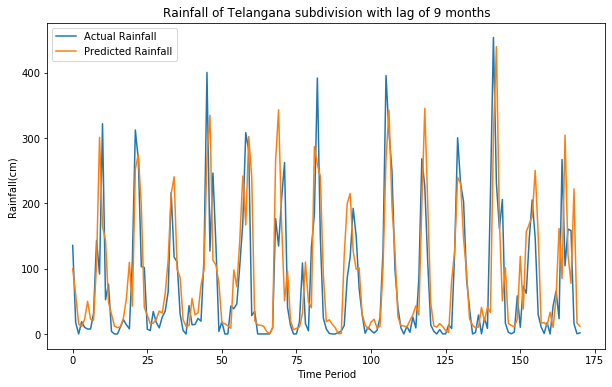

In [49]:
y_year_2001_2015 = y_year_2001_2015.reshape(171,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Telangana subdivision with lag of 9 months")
plt.legend()
plt.show()

In [50]:
import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(171,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for telangana sub-divison :")
print(RMSE)
print("NSE for telangana sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for telangana sub-division :")
print(R2)

Co-efficient of corelation :
0.7278093983522936
RMSE(mm) for telangana sub-divison :
73.36526820045638
NSE for telangana sub-division :
0.4586450353800632
R2 score for telangana sub-division :
0.4586450353800632


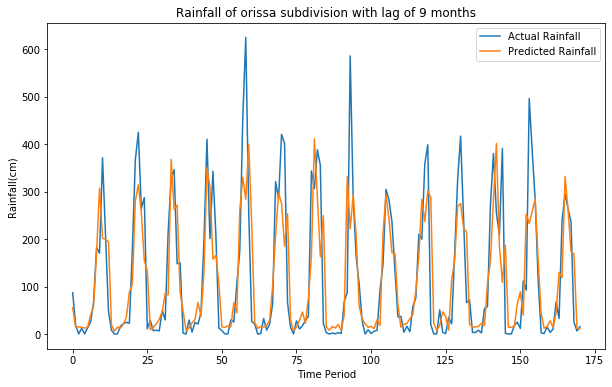

Co-efficient of corelation :
0.7728374894236172
RMSE(mm) for orissa sub-divison :
92.23019293099719
NSE for orissa sub-division :
0.5968757891289684
R2 score for orissa sub-division :
0.5968757891289684


In [51]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'ORISSA'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-9):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+9]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,9)
        y_year_2001_2015 = data_2001_2015[i+9]
    else:
        temp = data_2001_2015[i:i+9].reshape(1,9)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+9]), axis=0)

y_year_2001_2015 = y_year_2001_2015.reshape(171,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of orissa subdivision with lag of 9 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(171,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for orissa sub-divison :")
print(RMSE)
print("NSE for orissa sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for orissa sub-division :")
print(R2)

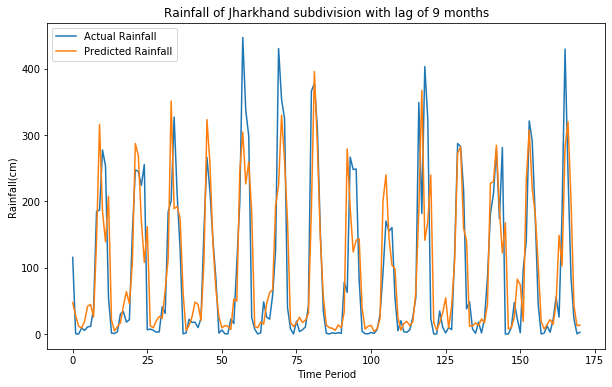

Co-efficient of corelation :
0.8059500582297802
RMSE(mm) for jharkhand sub-divison :
70.65867543899472
NSE for jharkhand sub-division :
0.6464251158868483
R2 score for jharkhand sub-division :
0.6464251158868483


In [52]:
data_2001_2015 = np.asarray(test_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
      'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[test_data['SUBDIVISION'] == 'JHARKHAND'])

data_2001_2015 = data_2001_2015.reshape(data_2001_2015.shape[0]*12,1)

X_year_2001_2015 = None; y_year_2001_2015 = None

for i in range(data_2001_2015.shape[0]-9):
    if X_year_2001_2015 is None:
        X_year_2001_2015 = data_2001_2015[i:i+9]
        X_year_2001_2015 = X_year_2001_2015.reshape(1,9)
        y_year_2001_2015 = data_2001_2015[i+9]
    else:
        temp = data_2001_2015[i:i+9].reshape(1,9)
        X_year_2001_2015 = np.concatenate((X_year_2001_2015, temp), axis=0)
        y_year_2001_2015 = np.concatenate((y_year_2001_2015, data_2001_2015[i+9]), axis=0)

y_year_2001_2015 = y_year_2001_2015.reshape(171,)
y_year_pred_2001_2015 = model.predict(X_year_2001_2015)

plt.figure(figsize=(10,6))
plt.plot(y_year_2001_2015,label="Actual Rainfall")
plt.plot(y_year_pred_2001_2015,label="Predicted Rainfall")
plt.xlabel("Time Period")
plt.ylabel("Rainfall(cm)")
plt.title("Rainfall of Jharkhand subdivision with lag of 9 months")
plt.legend()
plt.show()

import math
import scipy.stats
mse = sklearn.metrics.mean_squared_error(y_year_2001_2015,y_year_pred_2001_2015)

y_year_pred_2001_2015 = y_year_pred_2001_2015.reshape(171,)
r = np.corrcoef(y_year_2001_2015,y_year_pred_2001_2015)
print("Co-efficient of corelation :")
print(r[0][1])
RMSE = math.sqrt(mse)
print("RMSE(mm) for jharkhand sub-divison :")
print(RMSE)
print("NSE for jharkhand sub-division :")
print(NSE(y_year_pred_2001_2015,y_year_2001_2015))
R2 = sklearn.metrics.r2_score(y_year_2001_2015,y_year_pred_2001_2015)
print("R2 score for jharkhand sub-division :")
print(R2)